In [1]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import statsmodels.api as sm

In [2]:
df = pd.read_csv('RRCA_baseflow.csv')
input_df = df.drop(['Observed'], axis=1)
output_df = df[['Observed']]
df.head(5)

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689


In [7]:
df_LR = LR(fit_intercept = True)
display(input_df.shape, output_df.shape)
df_LR.fit(input_df, output_df)
display(df_LR.score(input_df, output_df))
input_df = sm.add_constant(input_df)
model = sm.OLS(output_df, input_df)
results = model.fit()
print(results.summary())

(15591, 7)

(15591, 1)

0.23561219615552864

                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     686.2
Date:                Wed, 11 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:07:15   Log-Likelihood:                -82863.
No. Observations:               15591   AIC:                         1.657e+05
Df Residuals:                   15583   BIC:                         1.658e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1602.7269     89

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


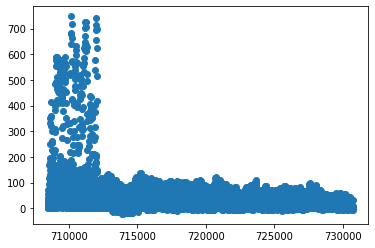

In [4]:
general_plot_df = df[['Date', 'Observed']]
general_plot_df.head(5)
plt.figure()
plt.scatter(general_plot_df.Date.values, general_plot_df.Observed.values)

# Breaking it down into river segments

In [9]:
data_frame_list = []
r_scores_for_each_segment = []
all_grid_scores = []
for segment in df.Segment_id.unique():
    current_segment = df[df.Segment_id == segment]
    segment_input = current_segment.drop(['Observed'], axis=1)
    segment_output = current_segment[['Observed']]
    segment_LR = LR()
    segment_LR.fit(segment_input, segment_output)
    columns = ['Evapotranspiration', 'Precipitation', 'Irrigation_pumping']
    r_scores_for_each_segment.append(segment_LR.score(segment_input, segment_output))

    grid_results = []
    for j in columns:
        new_input = current_segment[[j]]
        #display(new_input.shape, segment_output.shape)
        grid_LR = LR()
        grid_LR.fit(new_input, segment_output)
        grid_results.append(grid_LR.score(new_input, segment_output))
    grid1, grid2, grid3 = grid_results[0], grid_results[1], grid_results[2]
    all_grid_scores.append(grid_results)

    input_df = sm.add_constant(segment_input)
    model = sm.OLS(segment_output, input_df)
    results = model.fit()
    print(results.summary(), 'and this is the r square value ', segment_LR.score(segment_input, segment_output))

#     test_df = current_segment[['Evapotranspiration', 'Precipitation']]
#     display(test_df.head(5))
    other_grid = []
    for k in range(3):
        for x in range(3):
            if x <= k:
                continue
            else:
                new_df = current_segment[[columns[k], columns[x]]]
                other_grid_LR = LR()
                other_grid_LR.fit(new_df, segment_output)
                other_grid.append(other_grid_LR.score(new_df, segment_output))
    other_grid1, other_grid2, other_grid3 = other_grid[0], other_grid[1], other_grid[2]
    data_frame_list.append([segment, grid1, grid2, grid3, other_grid1, other_grid2, other_grid3, segment_LR.score(segment_input, segment_output)])
                
#display(df.Segment_id.unique(), df.Segment_id.unique().shape, r_scores_for_each_segment)
#display('all the grid scores\n', all_grid_scores)
column_df = ['segmentId', 'Evapotranspiration', 'Precipitation', 'IrrigationPumping', 'EvapotranspirationAndPrecipitation',
             'EvapotranspirationAndIrrigationPumping', 'PrecipitationAndIrrigationPumping', 'all3Used']
full_df = pd.DataFrame(data_frame_list, columns = column_df)
#full_df.save_csv(index = False)

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     6.097
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           0.000177
Time:                        21:24:19   Log-Likelihood:                -330.64
No. Observations:                 118   AIC:                             671.3
Df Residuals:                     113   BIC:                             685.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date                  -0.0002   4.91

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     76.96
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           5.70e-32
Time:                        21:24:19   Log-Likelihood:                -442.72
No. Observations:                 123   AIC:                             895.4
Df Residuals:                     118   BIC:                             909.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date                  -0.0085      0

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     61.02
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           1.75e-48
Time:                        21:24:19   Log-Likelihood:                -1297.0
No. Observations:                 456   AIC:                             2606.
Df Residuals:                     450   BIC:                             2631.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date                  -0.0002   6.04

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     10.89
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           4.22e-07
Time:                        21:24:20   Log-Likelihood:                 45.535
No. Observations:                  85   AIC:                            -81.07
Df Residuals:                      80   BIC:                            -68.86
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date               -3.761e-05   2.73

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     59.24
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           5.12e-39
Time:                        21:24:20   Log-Likelihood:                -560.42
No. Observations:                 393   AIC:                             1131.
Df Residuals:                     388   BIC:                             1151.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date                   0.0001    1.1

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     59.70
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           1.36e-37
Time:                        21:24:20   Log-Likelihood:                -590.08
No. Observations:                 324   AIC:                             1190.
Df Residuals:                     319   BIC:                             1209.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date               -8.058e-05   1.55

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))
D:\Spyder\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
D:\Spyder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value enco

                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     229.5
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           4.31e-88
Time:                        21:24:21   Log-Likelihood:                -1084.7
No. Observations:                 240   AIC:                             2181.
Df Residuals:                     234   BIC:                             2202.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date                   0.0029      0

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     47.58
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           1.88e-24
Time:                        21:24:21   Log-Likelihood:                -466.91
No. Observations:                 133   AIC:                             943.8
Df Residuals:                     128   BIC:                             958.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date                   0.0032      0

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     134.4
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           1.30e-81
Time:                        21:24:21   Log-Likelihood:                -2061.8
No. Observations:                 596   AIC:                             4134.
Df Residuals:                     591   BIC:                             4156.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date                  -0.0004   6.59

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     50.45
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           1.70e-35
Time:                        21:24:21   Log-Likelihood:                -858.03
No. Observations:                 489   AIC:                             1726.
Df Residuals:                     484   BIC:                             1747.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date                   0.0001   1.41

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     140.3
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           1.94e-83
Time:                        21:24:22   Log-Likelihood:                -2376.7
No. Observations:                 576   AIC:                             4763.
Df Residuals:                     571   BIC:                             4785.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date                  -0.0018      0

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     11.22
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           1.04e-07
Time:                        21:24:22   Log-Likelihood:                -763.52
No. Observations:                 119   AIC:                             1537.
Df Residuals:                     114   BIC:                             1551.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date                   0.0321      0

D:\Spyder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     7.874
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           1.27e-05
Time:                        21:24:22   Log-Likelihood:                -589.97
No. Observations:                 116   AIC:                             1190.
Df Residuals:                     111   BIC:                             1204.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date                   0.0025      0

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     33.16
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           3.24e-24
Time:                        21:24:23   Log-Likelihood:                -1013.4
No. Observations:                 450   AIC:                             2037.
Df Residuals:                     445   BIC:                             2057.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date               -7.893e-06   2.04

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     10.82
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           1.08e-06
Time:                        21:24:23   Log-Likelihood:                -133.43
No. Observations:                  66   AIC:                             276.9
Df Residuals:                      61   BIC:                             287.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date                   0.0001      0

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     62.35
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           4.33e-45
Time:                        21:24:23   Log-Likelihood:                -2700.5
No. Observations:                 706   AIC:                             5411.
Df Residuals:                     701   BIC:                             5434.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date                  -0.0004   6.68

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
D:\Spyder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
D:\Spyder\lib\si

                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     73.57
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           7.08e-52
Time:                        21:24:24   Log-Likelihood:                -1040.3
No. Observations:                 342   AIC:                             2093.
Df Residuals:                     336   BIC:                             2116.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date                   0.0013      0

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     299.1
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          5.99e-152
Time:                        21:24:24   Log-Likelihood:                -2381.9
No. Observations:                 732   AIC:                             4774.
Df Residuals:                     727   BIC:                             4797.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date                  -0.0009   4.04

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


 and this is the r square value  0.6914757984924859
                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     16.73
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           5.03e-05
Time:                        21:24:25   Log-Likelihood:                -177.02
No. Observations:                 495   AIC:                             358.0
Df Residuals:                     493   BIC:                             366.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

D:\Spyder\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
D:\Spyder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\si

 and this is the r square value  0.03282587501443679
                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     5.077
Date:                Wed, 11 Mar 2020   Prob (F-statistic):             0.0248
Time:                        21:24:25   Log-Likelihood:                -912.69
No. Observations:                 399   AIC:                             1829.
Df Residuals:                     397   BIC:                             1837.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

D:\Spyder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
D:\Spyder\lib\si

                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.01042
Date:                Wed, 11 Mar 2020   Prob (F-statistic):              0.919
Time:                        21:24:25   Log-Likelihood:                -2231.6
No. Observations:                 656   AIC:                             4467.
Df Residuals:                     654   BIC:                             4476.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date                5.031e-06   4.93

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
D:\Spyder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
D:\Spyder\lib\si

                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           9.59e-23
Time:                        21:24:25   Log-Likelihood:                -1948.9
No. Observations:                 718   AIC:                             3902.
Df Residuals:                     716   BIC:                             3911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date                  -0.0002   2.16

D:\Spyder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     194.0
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           1.20e-34
Time:                        21:24:26   Log-Likelihood:                -171.33
No. Observations:                 315   AIC:                             346.7
Df Residuals:                     313   BIC:                             354.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Date                  -0.0001   8.51

D:\Spyder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [6]:
#full_df.head(15)


In [8]:
# r_scores = []
# for segment in df.Segment_id.unique():
#     current_segment = df[df.Segment_id == segment]
#     segment_input = current_segment.drop(['Observed', 'Segment_id'], axis=1)
#     display(segment_input.head(5))
#     segment_output = current_segment[['Observed']]
#     segment_LR = LR()
#     segment_LR.fit(segment_input, segment_output)
#     r_scores.append(segment_LR.score(segment_input, segment_output))
# display(df.Segment_id.unique(), df.Segment_id.unique().shape, r_scores)
(p,r,f,s) = precision_recall_fscore_support(y_ctrue, y_cpredict)
